In [1]:
!uv pip install matplotlib

Audited 1 package in 54ms


In [7]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
X = np.random.random((100, 2))

In [ ]:
def k_means(X: np.ndarray, k: int, min_movement_per_iter: float) -> np.array:
    """
    Initializes random centroids which have the same coordinates as existing rows in X
    then runs the expectation-maximization algorithm until the most that any centroid moves
    across iterations is min_movement_per_iter
    """
    m, _ = X.shape
    assert k <= m, "cannot have more centroids than there are points"
    # choosing centroids that are points ensures that each centroid is assigned to at least one point initially
    init_centroid_idxes = np.random.choice(m, size=k, replace=False)
    centroids = X[init_centroid_idxes]
    while True:
        X_to_centroid_dists = abs(X[..., None] - centroids.T).sum(axis=1) 
        closest_centroid_idxes = X_to_centroid_dists.argmin(axis=1) # (m,) -> for each point in X, find closest centroid idx in `centroids`
        closest_centroid_one_hot = closest_centroid_idxes[:, None] == np.arange(k)[None, :] # (m, k) -> for each point, represent its centroid idx with one-hot vector of length k
        # TODO: consider selecting the vals with indexing instead of multiplying by the mask
        X_to_centroid = X[:,:,None] * closest_centroid_one_hot[:, None, :] # (m, 1, k) * (m, d, 1) = (m, d, k) where for each point p, if it's closest to centroid c, then selected_vals[p,:,c] = X[p, :], otherwise 0
        centroid_sums = X_to_centroid.sum(axis=0).T # (k, d) -> for each of k clusters, sum across all points' embed dimensions
        centroid_counts = closest_centroid_one_hot.sum(axis=0) # (k,) -> count how many points are in each cluster
        if any(centroid_counts == 0):
            raise Exception("At least one centroid was not assigned any points.")
        new_centroids = centroid_sums / centroid_counts[:, None]
        max_amount_any_centroid_moved = max(abs(centroids - new_centroids).sum(axis=1))
        if max_amount_any_centroid_moved < min_movement_per_iter:
            centroids = new_centroids
            break
        centroids = new_centroids
    return centroids

In [21]:
means = k_means(X, 4, 1e-5)

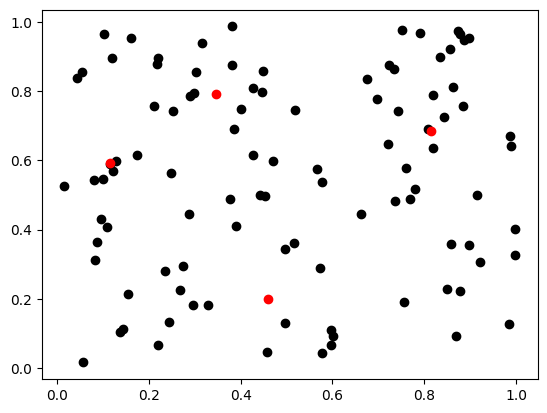

In [22]:
plt.scatter(X[:, 0], X[:, 1], color='black')
plt.scatter(means[:, 0], means[:, 1], color='red')